In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1500)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [30]:
AUTOTUNE=4

In [1]:
pwd

'/jupyter_files/tensorflow_keras_example'

In [2]:
ls data

sampleSubmission.csv  test1/  train/


In [4]:
import pathlib

In [5]:
                                         
data_root = pathlib.Path('data')
print(data_root)

data


In [6]:
for index,item in enumerate(data_root.iterdir()):
  print(item)
  if index>20:
   break

data/test1
data/sampleSubmission.csv
data/train


In [7]:
import random
#读取文档下的所有路径，直接用正则表达式不需要遍历目录就可以了
all_image_paths = list(data_root.glob('train/*.jpg'))
# print(all_image_paths[:20])
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

25000

In [8]:
label_names=[ 'cat' if 'cat' in each else 'dog'  for each in all_image_paths ]

In [9]:
print(all_image_paths[:20])
print(label_names[:20])

['data/train/dog.623.jpg', 'data/train/dog.3125.jpg', 'data/train/cat.3300.jpg', 'data/train/cat.8431.jpg', 'data/train/dog.11478.jpg', 'data/train/dog.2889.jpg', 'data/train/cat.11268.jpg', 'data/train/cat.5980.jpg', 'data/train/dog.8281.jpg', 'data/train/cat.9759.jpg', 'data/train/cat.10119.jpg', 'data/train/cat.3118.jpg', 'data/train/dog.2053.jpg', 'data/train/cat.8573.jpg', 'data/train/dog.4237.jpg', 'data/train/cat.2866.jpg', 'data/train/dog.2023.jpg', 'data/train/dog.1134.jpg', 'data/train/dog.10714.jpg', 'data/train/cat.1618.jpg']
['dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat']


In [83]:
all_image_paths[:10]

['data/train/cat.6381.jpg',
 'data/train/dog.7527.jpg',
 'data/train/cat.7543.jpg',
 'data/train/dog.3778.jpg',
 'data/train/cat.6220.jpg',
 'data/train/cat.4035.jpg',
 'data/train/dog.3576.jpg',
 'data/train/cat.5043.jpg',
 'data/train/dog.664.jpg',
 'data/train/dog.9430.jpg']

In [10]:
all_image_labels=[0 if 'cat' in each else 1 for each in label_names]

In [85]:
all_image_labels[:20]

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]

In [86]:
import IPython.display as display


In [87]:
img_path='data/test1/8837.jpg'

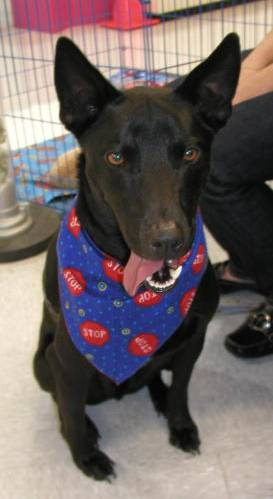

In [88]:
display.Image(img_path)

In [89]:
# label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
# label_names

In [90]:
import tensorflow as tf

In [91]:
#
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=490, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00...


In [92]:
#Decode it into an image tensor:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(499, 273, 3)
<dtype: 'uint8'>


In [93]:
for img_path in all_image_paths[0:20]:
    img_raw = tf.io.read_file(img_path)
    #Decode it into an image tensor:
    img_tensor = tf.image.decode_image(img_raw)

    print(img_tensor.shape)
    print(img_tensor.dtype)


(466, 499, 3)
<dtype: 'uint8'>
(374, 500, 3)
<dtype: 'uint8'>
(224, 300, 3)
<dtype: 'uint8'>
(237, 186, 3)
<dtype: 'uint8'>
(309, 500, 3)
<dtype: 'uint8'>
(266, 288, 3)
<dtype: 'uint8'>
(227, 165, 3)
<dtype: 'uint8'>
(375, 499, 3)
<dtype: 'uint8'>
(278, 369, 3)
<dtype: 'uint8'>
(448, 335, 3)
<dtype: 'uint8'>
(200, 249, 3)
<dtype: 'uint8'>
(375, 499, 3)
<dtype: 'uint8'>
(375, 499, 3)
<dtype: 'uint8'>
(375, 499, 3)
<dtype: 'uint8'>
(500, 354, 3)
<dtype: 'uint8'>
(189, 299, 3)
<dtype: 'uint8'>
(358, 499, 3)
<dtype: 'uint8'>
(375, 499, 3)
<dtype: 'uint8'>
(375, 499, 3)
<dtype: 'uint8'>
(331, 500, 3)
<dtype: 'uint8'>


In [94]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.9977543


In [14]:
# Wrap up these up in simple functions for later.
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [24]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

Text(0.5, 1.0, 'Cat')

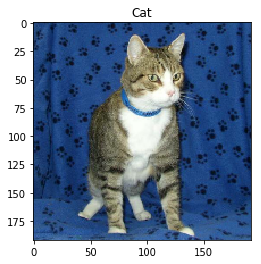

In [97]:
import matplotlib.pyplot as plt
label = all_image_labels[0]
image_path = all_image_paths[0]


plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
# plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())


In [98]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [99]:
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [100]:
# Now create a new dataset that loads and formats images on the fly by mapping preprocess_image over the dataset of paths.
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=2)

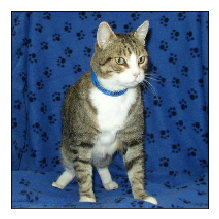

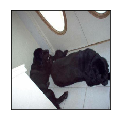

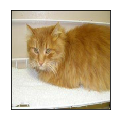

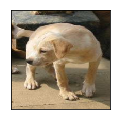

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
#   plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [18]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [103]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

cat
dog
cat
dog
cat
cat
dog
cat
dog
dog


In [104]:
# Since the datasets are in the same order you can just zip them together to get a dataset of (image, label) pairs:

In [105]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [107]:
# The new dataset's shapes and types are tuples of shapes and types as well, describing each field:

In [108]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [109]:
# Note: When you have arrays like all_image_labels and all_image_paths an alternative to tf.data.dataset.Dataset.zip is to slice the pair of arrays.

In [ ]:
# ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# # The tuples are unpacked into the positional arguments of the mapped function
# def load_and_preprocess_from_path_label(path, label):
#   return load_and_preprocess_image(path), label

# image_label_ds = ds.map(load_and_preprocess_from_path_label)
# image_label_ds

In [110]:
# To train a model with this dataset you will want the data:

# To be well shuffled.
# To be batched.
# To repeat forever.
# Batches to be available as soon as possible.
# These features can be easily added using the tf.data api.

In [20]:
BATCH_SIZE = 32

In [112]:


# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches in the background while the model is training.
ds = ds.prefetch(buffer_size=4)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [113]:
# This last point can be addressed by using the tf.data.Dataset.apply method with the fused tf.data.experimental.shuffle_and_repeat function:

In [115]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=4)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [116]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 174s 18us/step


In [ ]:
#This model expects its input to be normalized to the [-1,1] range:

In [118]:
# help(keras_applications.mobilenet_v2.preprocess_input)

AttributeError: module 'tensorflow' has no attribute 'keras_applications'

In [ ]:
# Before you pass the input to the MobilNet model, you need to convert it from a range of [0,1] to [-1,1]:

In [119]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

In [ ]:
# The MobileNet returns a 6x6 spatial grid of features for each image.

# Pass it a batch of images to see:

In [120]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [121]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [122]:
# Build a model wrapped around MobileNet and use tf.keras.layers.GlobalAveragePooling2D to average over those space dimensions before the output tf.keras.layers.Dense layer:

In [123]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

In [124]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 9.849722e-06
max logit: 0.00013632944

Shape: (32, 25000)


In [125]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [126]:
len(model.trainable_variables)

2

In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 25000)             32025000  
Total params: 34,282,984
Trainable params: 32,025,000
Non-trainable params: 2,257,984
_________________________________________________________________


In [128]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

782.0

In [ ]:
model.fit(ds, epochs=1, steps_per_epoch=3)

In [130]:
print('hh')

hh


In [131]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

In [133]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=4)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [134]:
timeit(ds)

.............................................................................................................................................................
1565.0 batches: 244.55474734306335 s
204.78032 Images/s
Total time: 304.75481510162354s


In [135]:
# Cache
# Use tf.data.Dataset.cache to easily cache calculations across epochs. This is very efficient, especially when the data fits in memory


In [136]:
# Here the images are cached, after being pre-precessed (decoded and resized):

In [137]:
ds = image_label_ds.cache()
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=4)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
timeit(ds)

In [ ]:
# One disadvantage to using an in memory cache is that the cache must be rebuilt on each run, giving the same startup delay each time the dataset is started:

In [ ]:
timeit(ds)

In [ ]:
# If the data doesn't fit in memory, use a cache file:

In [ ]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

In [ ]:
timeit(ds)

In [ ]:
# The cache file also has the advantage that it can be used to quickly restart the dataset without rebuilding the cache. Note how much faster it is the second time:

In [ ]:
timeit(ds)

In [2]:
# TFRecord File
# Raw image data
# TFRecord files are a simple format to store a sequence of binary blobs. By packing multiple examples into the same file, TensorFlow is able to read multiple examples at once, which is especially important for performance when using a remote storage service such as GCS.

In [3]:
# First, build a TFRecord file from the raw image data:

In [11]:

image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)



In [12]:
ls -lh


total 556M
drwxr-xr-x 2 root root 4.0K Jul 11 02:40 106save/
drwxr-xr-x 2 root root 4.0K Jul 11 02:44 106save02/
drwxr-xr-x 2 root root 4.0K Jul 11 02:45 106save03/
-rw-r--r-- 1 root root 1.2M Jul 11 02:45 106save03.h5
-rw-r--r-- 1 root root  30K Jul  8 09:22 all_model.h5
-rw-r--r-- 1 root root   89 Jul 10 06:23 checkpoint
drwxr-xr-x 2 root root 4.0K Jul 10 06:34 ck_model_dir/
drwxr-xr-x 2 root root 4.0K Jul 10 06:33 ckpt/
drwxrwxrwx 4 root root 4.0K Jul 22 07:53 data/
-rw-r--r-- 1 root root 121K Jul 13 07:02 dcgan.gif.png
-rw-r--r-- 1 root root 346K Jul 11 08:02 dog.png
drwxr-xr-x 4 root root 4.0K Jul 10 05:36 full_path_to_your_logs/
-rw-r--r-- 1 root root  13K Jul 10 08:05 heart.csv
-rw-r--r-- 1 root root  17K Jul 13 06:46 image_at_epoch_0001.png
-rw-r--r-- 1 root root  29K Jul 13 06:47 image_at_epoch_0002.png
-rw-r--r-- 1 root root 546M Jul 23 00:58 images.tfrec
-rw-r--r-- 1 root root  34K Jul 12 05:23 keras_example_auto_encoder.ipynb
-rw-r--r-- 1 root root  17K Jul 13 05:33 keras_e

In [13]:
# Next, build a dataset that reads from the TFRecord file and decodes/reformats the images using the preprocess_image function you defined earlier:

In [15]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [16]:
# Zip that dataset with the labels dataset you defined earlier to get the expected (image,label) pairs:

In [21]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(4)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
# This is slower than the cache version because you have not cached the preprocessing.
timeit(ds)

In [22]:
# Serialized Tensors
# To save some preprocessing to the TFRecord file, first make a dataset of the processed images, as before:

In [25]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [26]:
# Now instead of a dataset of .jpeg strings, you have a dataset of tensors.

In [27]:
# To serialize this to a TFRecord file you first convert the dataset of tensors to a dataset of strings:

In [28]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [29]:
# 保存这个太大了有11g
# tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
# tfrec.write(ds)
'''
total 11G
drwxr-xr-x 2 root root 4.0K Jul 11 02:40 106save/
drwxr-xr-x 2 root root 4.0K Jul 11 02:44 106save02/
drwxr-xr-x 2 root root 4.0K Jul 11 02:45 106save03/
-rw-r--r-- 1 root root 1.2M Jul 11 02:45 106save03.h5
-rw-r--r-- 1 root root  30K Jul  8 09:22 all_model.h5
-rw-r--r-- 1 root root   89 Jul 10 06:23 checkpoint
drwxr-xr-x 2 root root 4.0K Jul 10 06:34 ck_model_dir/
drwxr-xr-x 2 root root 4.0K Jul 10 06:33 ckpt/
drwxrwxrwx 4 root root 4.0K Jul 22 07:53 data/
-rw-r--r-- 1 root root 121K Jul 13 07:02 dcgan.gif.png
-rw-r--r-- 1 root root 346K Jul 11 08:02 dog.png
drwxr-xr-x 4 root root 4.0K Jul 10 05:36 full_path_to_your_logs/
-rw-r--r-- 1 root root  13K Jul 10 08:05 heart.csv
-rw-r--r-- 1 root root  17K Jul 13 06:46 image_at_epoch_0001.png
-rw-r--r-- 1 root root  29K Jul 13 06:47 image_at_epoch_0002.png
-rw-r--r-- 1 root root  11G Jul 23 01:09 images.tfrec
-rw-r--r-- 1 root root  34K Jul 12 05:23 keras_example_auto_encoder.ipynb
-rw-r--r-- 1 root root  17K Jul 13 05:33 keras_example_auto_encoder_cnn.ipynb
-rw-r--r-- 1 root root  17K Jul 17 08:10 keras_example_autograph.ipynb
-rw-r--r-- 1 root root  37K Jul  8 09:25 keras_example_base.ipynb
-rw-r--r-- 1 root root 9.5K Jul 17 08:48 keras_example_beta1.ipynb
-rw-r--r-- 1 root root  25K Jul 15 06:53 keras_example_build_self_layers.ipynb
-rw-r--r-- 1 root root  29K Jul 11 07:25 keras_example_cnn.ipynb
-rw-r--r-- 1 root root  66K Jul 11 07:49 keras_example_cnn_extrenal.ipynb
-rw-r--r-- 1 root root  44K Jul 11 08:00 keras_example_cnn_text.ipynb
-rw-r--r-- 1 root root 259K Jul 13 07:02 keras_example_dcgan.ipynb
-rw-r--r-- 1 root root  20K Jul 10 06:41 keras_example_eager.ipynb
-rw-r--r-- 1 root root  37K Jul 13 05:29 keras_example_embedding.ipynb
-rw-r--r-- 1 root root  50K Jul 13 07:24 keras_example_estimator_bosstedtree.ipynb
-rw-r--r-- 1 root root  60K Jul 10 03:03 keras_example_function.ipynb
-rw-r--r-- 1 root root 381K Jul 23 01:11 keras_example_load_data.ipynb
-rw-r--r-- 1 root root  18K Jul 11 02:57 keras_example_mlp.ipynb
-rw-r--r-- 1 root root  34K Jul 15 06:54 keras_example_mlp_skills.ipynb
-rw-r--r-- 1 root root 244K Jul 10 08:01 keras_example_over_or_under_fitting.ipynb
-rw-r--r-- 1 root root  11K Jul 10 07:13 keras_example_pitcures_class.ipynb
-rw-r--r-- 1 root root 455K Jul 11 09:06 keras_example_pre_trained.ipynb
-rw-r--r-- 1 root root 252K Jul 11 01:07 keras_example_regression.ipynb
-rw-r--r-- 1 root root  30K Jul 12 04:55 keras_example_rnn.ipynb
-rw-r--r-- 1 root root  25K Jul 11 02:47 keras_example_save_load.ipynb
-rw-r--r-- 1 root root  19K Jul 10 06:23 keras_example_save_serize.ipynb
-rw-r--r-- 1 root root  33K Jul 17 08:44 keras_example_struct_data_class.ipynb
-rw-r--r-- 1 root root  24K Jul 15 01:39 keras_example_struct_data_class_new.ipynb
-rw-r--r-- 1 root root  25K Jul 15 01:39 keras_example_struct_data_final.ipynb
-rw-r--r-- 1 root root 9.0K Jul 10 07:38 keras_example_text_class.ipynb
-rw-r--r-- 1 root root  45K Jul 10 05:44 keras_example_train_model.ipynb
-rw-r--r-- 1 root root  30K Jul 22 07:40 keras_example_transformer_learning.ipynb
-rw-r--r-- 1 root root 4.2K Jul 10 06:44 keras_example_variables.ipynb
-rw-r--r-- 1 root root 5.5K Jul 15 09:54 keras_examples_gpu.ipynb
drwxr-xr-x 4 root root 4.0K Jul  8 09:12 logs/
-rw-r--r-- 1 root root  75K Jul 13 05:28 meta.tsv
-rw-r--r-- 1 root root  36K Jul  8 09:20 model.h5
-rw-r--r-- 1 root root 1.8K Jul 10 06:21 model_config.json
-rw-r--r-- 1 root root 238K Jul  9 05:49 model_save.h5
-rw-r--r-- 1 root root 2.0K Jul 10 06:23 my_model_weights.data-00000-of-00002
-rw-r--r-- 1 root root 431K Jul 10 06:23 my_model_weights.data-00001-of-00002
-rw-r--r-- 1 root root 1.3K Jul 10 06:23 my_model_weights.index
-rw-r--r-- 1 root root 461K Jul 10 05:34 mymodel_1.h5
-rw-r--r-- 1 root root 461K Jul 10 05:34 mymodel_2.h5
-rw-r--r-- 1 root root 461K Jul 10 06:21 path_to_my_model.h5
-rw-r--r-- 1 root root 232K Jul 10 06:21 path_to_my_weights.h5
drwxr-xr-x 4 root root 4.0K Jul 10 06:14 saved_model/
drwxr-xr-x 3 root root 4.0K Jul 11 02:46 saved_models/
-rw-r--r-- 1 root root 461K Jul 10 06:13 the_save_model.h5
drwxr-xr-x 2 root root 4.0K Jul 13 06:47 training_checkpoints/
-rw-r--r-- 1 root root 1.8M Jul 13 05:28 vecs.tsv
-rw-r--r-- 1 root root 2.2K Jul 10 06:22 weight_tf_savedmodel.data-00000-of-00002
-rw-r--r-- 1 root root 431K Jul 10 06:22 weight_tf_savedmodel.data-00001-of-00002
-rw-r--r-- 1 root root 1.3K Jul 10 06:22 weight_tf_savedmodel.index
-rw-r--r-- 1 root root 232K Jul 10 06:22 weight_tf_savedmodel_h5
drwxr-xr-x 2 root root 4.0K Jul  8 09:20 weights/
'''

In [33]:
ls -lh

total 9.4M
drwxr-xr-x 2 root root 4.0K Jul 11 02:40 106save/
drwxr-xr-x 2 root root 4.0K Jul 11 02:44 106save02/
drwxr-xr-x 2 root root 4.0K Jul 11 02:45 106save03/
-rw-r--r-- 1 root root 1.2M Jul 11 02:45 106save03.h5
-rw-r--r-- 1 root root  30K Jul  8 09:22 all_model.h5
-rw-r--r-- 1 root root   89 Jul 10 06:23 checkpoint
drwxr-xr-x 2 root root 4.0K Jul 10 06:34 ck_model_dir/
drwxr-xr-x 2 root root 4.0K Jul 10 06:33 ckpt/
drwxrwxrwx 4 root root 4.0K Jul 22 07:53 data/
-rw-r--r-- 1 root root 121K Jul 13 07:02 dcgan.gif.png
-rw-r--r-- 1 root root 346K Jul 11 08:02 dog.png
drwxr-xr-x 4 root root 4.0K Jul 10 05:36 full_path_to_your_logs/
-rw-r--r-- 1 root root  13K Jul 10 08:05 heart.csv
-rw-r--r-- 1 root root  17K Jul 13 06:46 image_at_epoch_0001.png
-rw-r--r-- 1 root root  29K Jul 13 06:47 image_at_epoch_0002.png
-rw-r--r-- 1 root root  34K Jul 12 05:23 keras_example_auto_encoder.ipynb
-rw-r--r-- 1 root root  17K Jul 13 05:33 keras_example_auto_encoder_cnn.ipynb
-rw-r--r-- 1 root root  

In [32]:
# !rm images.tfrec

In [ ]:
# With the preprocessing cached, data can be loaded from the TFrecord file quite efficiently - just remember to de-serialize tensor before using it:

In [ ]:
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
  result = tf.io.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=4)
ds

In [ ]:
# Now, add the labels and apply the same standard operations, as before:

In [ ]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

In [ ]:
timeit(ds)